# US Baby Names 1880–2010
Управление социального обеспечения США выложило в сеть данные о частоте
встречаемости детских имен за период с 1880 года по настоящее время.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Каталог **babynames** содержащит файлы с именами вида **yob1880.txt**, которые представляют собой БД сохраненную в формате **.csv**

In [2]:
names = pd.read_csv("babynames/yob1880.txt", 
                    names = ["name", "sex", "birth"])
names

,name,sex,birth
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


В эти файлы включены только имена, которыми были названы не  менее
5 младенцев в году, поэтому для простоты сумму значений в столбце **sex** можно считать общим числом родившихся в данном году младенцев

In [3]:
names.groupby("sex")["birth"].sum()

sex
F     90993
M    110493
Name: birth, dtype: int64

Поскольку в каждом файле находятся данные только за один год, то первое,
что нужно сделать, – собрать все данные в единый объект **DataFrame** и добавить поле **year**.

In [33]:
pieces = []
for year in range(1880, 2011):
    path = f"babynames/yob{year}.txt"
    frame = pd.read_csv(path, names = ["name", "sex", "birth"])
    frame["year"] = year
    pieces.append(frame)
names = pd.concat(pieces, ignore_index=True)

In [34]:
names

,name,sex,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


Имея эти данные, мы уже можем приступить к  агрегированию на уровне
года и пола

In [35]:
total_birth = names.pivot_table("birth", index = "year", columns = "sex", aggfunc = sum)
total_birth.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


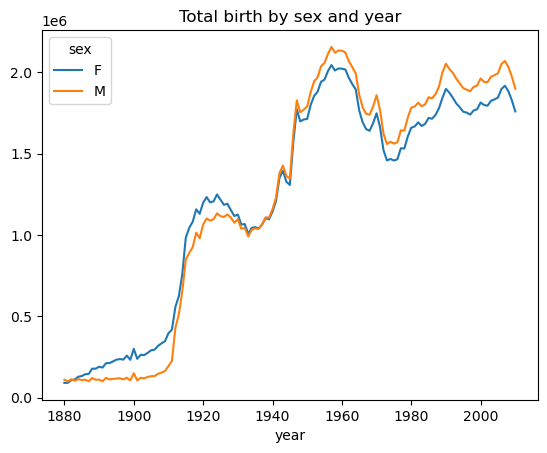

In [36]:
total_birth.plot(title = "Total birth by sex and year");

Далее вставим столбец prop, содержащий долю младенцев, получивших данное имя, относительно общего числа родившихся. Значение **prop**, равное 0.02,
означает, что данное имя получили 2 из 100 младенцев.

In [37]:
def add_prop(group):
    group["prop"] = group["birth"]/group["birth"].sum()
    return group
names = names.groupby(["year", "sex"], group_keys=False).apply(add_prop)

In [38]:
names

,name,sex,birth,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


Удостоверимся, что сумма
значений в столбце **prop** по всем группам равна 1.

In [39]:
names.groupby(["year","sex"])["prop"].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

Далее я  извлеку подмножество данных, чтобы упростить последующий
анализ: первые 1000 имен для каждой комбинации пола и года. 

In [44]:
def get_top1000(group):
    return group.sort_values("birth", ascending=False)[:1000]
grouped = names.groupby(["year", "sex"], group_keys=False)
top1000 = grouped.apply(get_top1000)
top1000

,name,sex,birth,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1677639,Camilo,M,194,2010,0.000102
1677640,Destin,M,194,2010,0.000102
1677641,Jaquan,M,194,2010,0.000102
1677642,Jaydan,M,194,2010,0.000102


Это набор, содержащий первые 1000 записей, мы и будем использовать его
для исследования данных в дальнейшем.

In [45]:
top1000.reset_index(drop=True)
top1000

,name,sex,birth,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1677639,Camilo,M,194,2010,0.000102
1677640,Destin,M,194,2010,0.000102
1677641,Jaquan,M,194,2010,0.000102
1677642,Jaydan,M,194,2010,0.000102


## Analyzing Naming Trends

Для начала разобьем набор **Top
1000** на части, относящиеся к мальчикам и девочкам

In [50]:
boys = top1000[top1000["sex"] == "M"]
girls = top1000[top1000["sex"] == "F"]
girls.head()

,name,sex,birth,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


Рассмотрим простые временные ряды, количество некоторых имен в каждом году

In [53]:
total_births = top1000.pivot_table("birth", index = "year", columns = "name", aggfunc = sum)
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


Глядя на рисунок, можно сделать вывод, что эти имена в Америке вышли из
моды. Однако делать выводы еще рано.

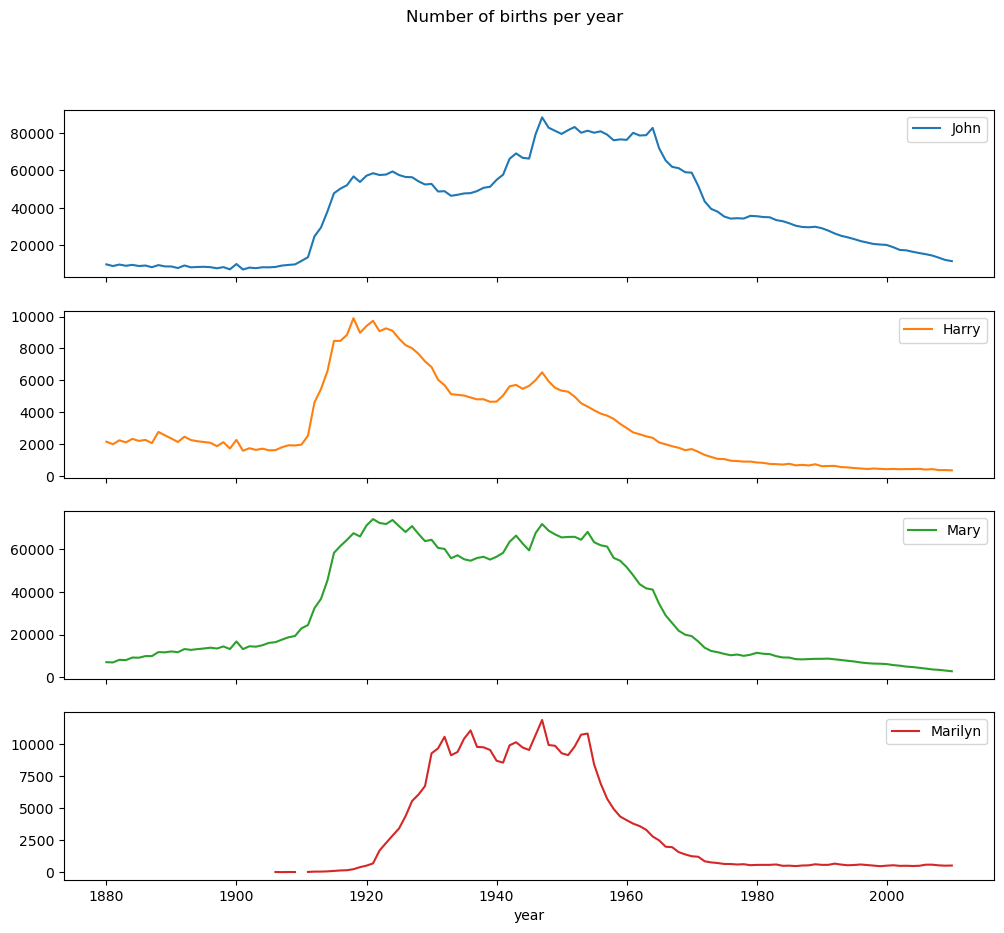

In [56]:
subset = total_births[["John", "Harry", "Mary", "Marilyn"]]
subset.plot(subplots=True, figsize = (12,10), title = "Number of births per year");

### Измерение роста разнообразия имен
Убывание кривых на рисунках выше можно объяснить тем, что меньше родителей стали выбирать для своих детей распространенные имена. Эту гипотезу
можно проверить и подтвердить имеющимися данными. Один из возможных
показателей – доля родившихся в наборе 1000 самых популярных имен, который я агрегирую по году и полу 

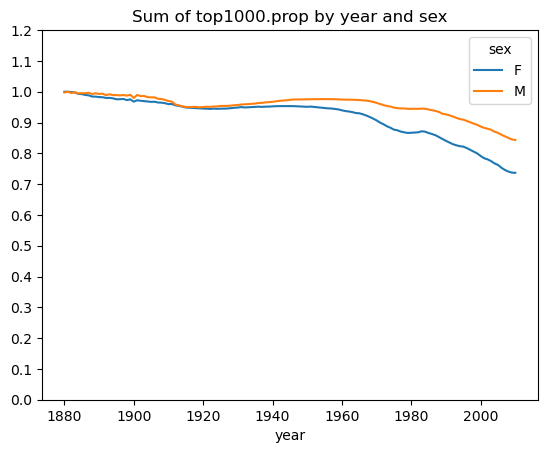

In [62]:
table = top1000.pivot_table("prop", index = "year", columns = "sex", aggfunc = sum)
table.plot(title = "Sum of top1000.prop by year and sex",
          yticks = np.linspace(0,1.2,13));

Действительно, похоже, что разнообразие имен растет (доля в первой тысяче падает). Другой интересный показатель  – количество различных имен
среди первых 50  % родившихся, упорядоченное по популярности в  порядке
убывания. Рассмотрим только имена мальчиков, родившихся в 2010 году.

In [63]:
df = boys[boys["year"] == 2010]
df

,name,sex,birth,year,prop
1676644,Jacob,M,21875,2010,0.011523
1676645,Ethan,M,17866,2010,0.009411
1676646,Michael,M,17133,2010,0.009025
1676647,Jayden,M,17030,2010,0.008971
1676648,William,M,16870,2010,0.008887
...,...,...,...,...,...
1677639,Camilo,M,194,2010,0.000102
1677640,Destin,M,194,2010,0.000102
1677641,Jaquan,M,194,2010,0.000102
1677642,Jaydan,M,194,2010,0.000102


In [65]:
prop_cumsum = df["prop"].sort_values(ascending = False).cumsum()
prop_cumsum[:10]

1676644    0.011523
1676645    0.020934
1676646    0.029959
1676647    0.038930
1676648    0.047817
1676649    0.056579
1676650    0.065155
1676651    0.073414
1676652    0.081528
1676653    0.089621
Name: prop, dtype: float64

In [67]:
prop_cumsum.searchsorted(0.5) + 1

117

Поскольку индексация массивов начинается с  нуля, то нужно прибавить
к результату 1 – получится 117. Вычислим данный показатель для 1900 года.

In [70]:
df = boys[boys["year"] == 1900]
in1900 = df["prop"].sort_values(ascending = False).cumsum()
in1900.searchsorted(0.5) + 1

25

Видно, что для 1900 года этот показатель гораздо меньше. Применим теперь эту комбинацию для каждого года и пола

In [74]:
def get_quantile_count(group , q=0.5):
    group = group.sort_values("prop", ascending = False)
    return group.prop.cumsum().searchsorted(q)
diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity = diversity.unstack()
diversity.head()

sex,F,M
year,,
1880,37,13
1881,37,13
1882,37,14
1883,38,14
1884,38,15


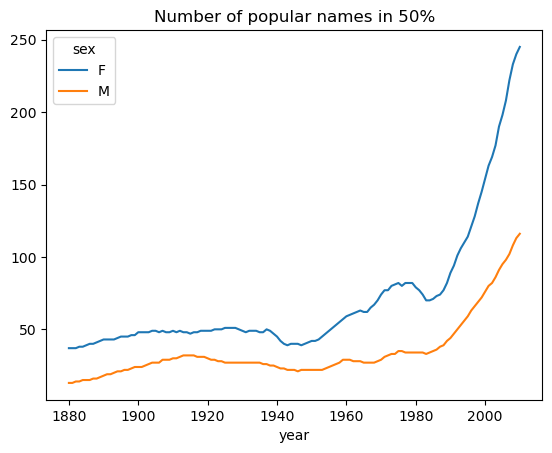

In [75]:
diversity.plot(title = "Number of popular names in 50%");

Как видим, девочкам всегда давали более разнообразные имена, чем мальчикам, и со временем эта тенденция проявляется все ярче.

### Революция «последней буквы»
В 2007  году исследовательница детских имен Лаура Уоттенберг отметила, что распределение имен мальчиков по последней букве за последние 100 лет существенно изменилось. Давайте в этом убедимся.

In [81]:
def get_last_letter(x):
    return x[-1]
last_letters = names["name"].map(get_last_letter)
last_letters.name = "last_letter"
table = names.pivot_table("birth", index=last_letters,
 columns=["sex", "year"], aggfunc=sum)

Выберем из всего периода три репрезентативных года и посмотрим на
первые несколько строк

In [83]:
subtable = table.reindex(columns = [1910, 1960, 2010], level = "year")
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

Далее я нормирую эту таблицу на общее число родившихся, чтобы вычислить новую таблицу, содержащую долю от общего количества родившихся для
каждого пола и каждой последней буквы

In [85]:
letter_prop = subtable / subtable.sum()
letter_prop.head()

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959

Зная доли букв, я теперь могу нарисовать столбчатые диаграммы для каждого пола, разбив их по годам

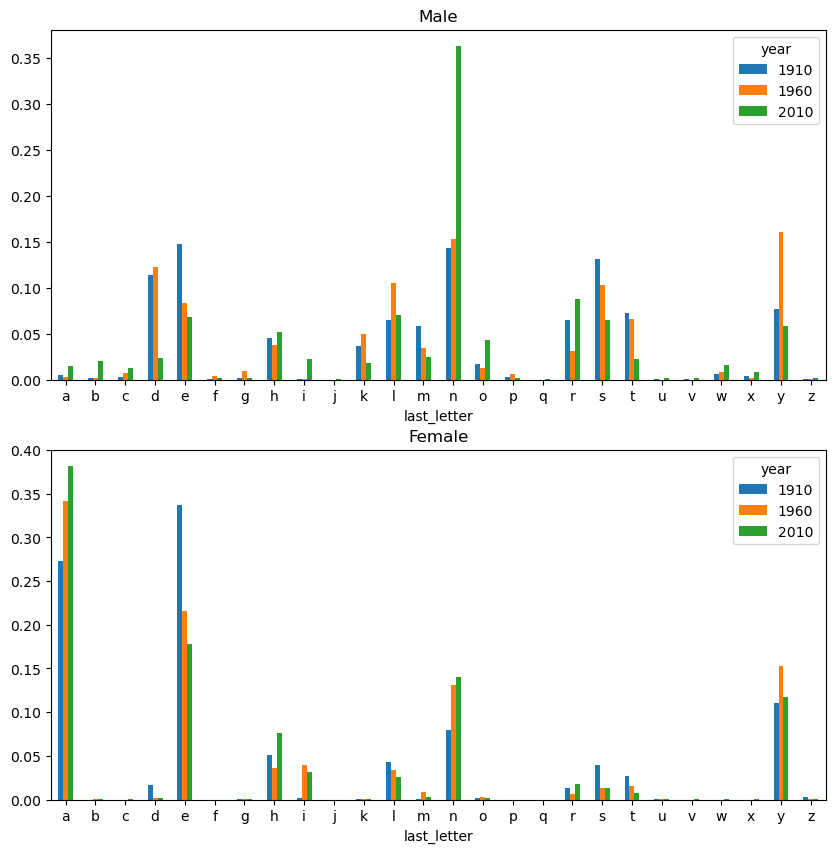

In [92]:
fig, axes = plt.subplots(2,1, figsize = (10,10))
letter_prop["M"].plot(kind = "bar",rot = 0, ax= axes[0], title = "Male")
letter_prop["F"].plot(kind = "bar",rot = 0, ax= axes[1], title = "Female");

Как видим, с 1960-х годов доля имен мальчиков, заканчивающихся буквой n,
значительно возросла. 

Снова вернусь к созданной ранее полной таблице, нормирую ее по году и полу, выберу некое подмножество букв для имен мальчиков и транспонирую, чтобы превратить каждый столбец во временной ряд

In [95]:
letter_prop = table / table.sum()
dny = letter_prop.loc[['d','n','y'], "M"].T
dny.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


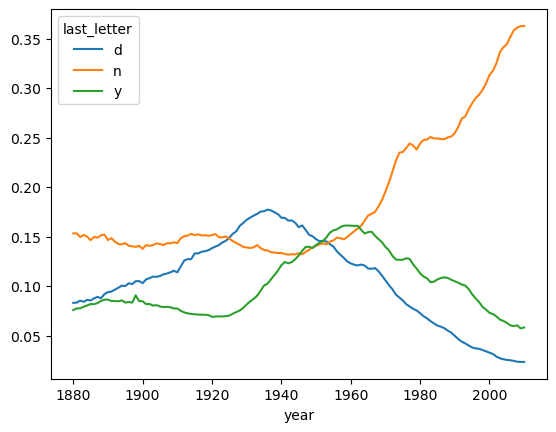

In [97]:
dny.plot();

### Мужские имена, ставшие женскими, и наоборот
Еще одна интересная темя для изучения – изучить имена, которые раньше часто давали мальчикам, а затем «сменили пол». Возьмем, к примеру, имя **Lesley** или
**Leslie**.

По набору **top1000** вычисляю список имен, начинающихся с **'lesl'**

In [102]:
all_names = pd.Series(top1000["name"].unique())
lesley_like = all_names[all_names.str.contains("Lesl")]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

Далее можно оставить только эти имена и просуммировать количество родившихся, сгруппировав по имени, чтобы найти относительные частоты

In [103]:
filtered = top1000[top1000["name"].isin(lesley_like)]
filtered.groupby("name")["birth"].sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: birth, dtype: int64

In [109]:
table = filtered.pivot_table("birth", index = "year", columns = "sex", aggfunc = "sum")
table = table.div(table.sum(axis = "columns"), axis = "index")
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


Наконец, строю график распределения по полу в зависимости
от времени

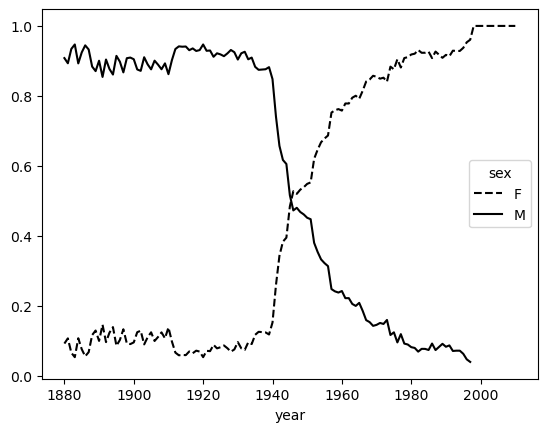

In [111]:
table.plot(style = {"M" : "k-", "F" : "k--"});